In [1]:
!pip install fastai[all]

In [2]:
!pip install timm>=0.6.2.dev0

In [3]:
from fastai.vision.all import *

/home/vk/anaconda3/envs/practise/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
trn_path = r'/home/vk/Desktop/Retina_Webapp/archive/gaussian_filtered_images/gaussian_filtered_images'

In [5]:
files = get_image_files(trn_path)

In [6]:
img = PILImage.create(files[0])
print(img.size)

(224, 224)


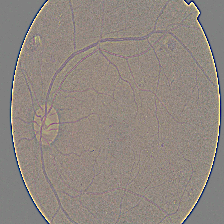

In [7]:
img.to_thumb(224)

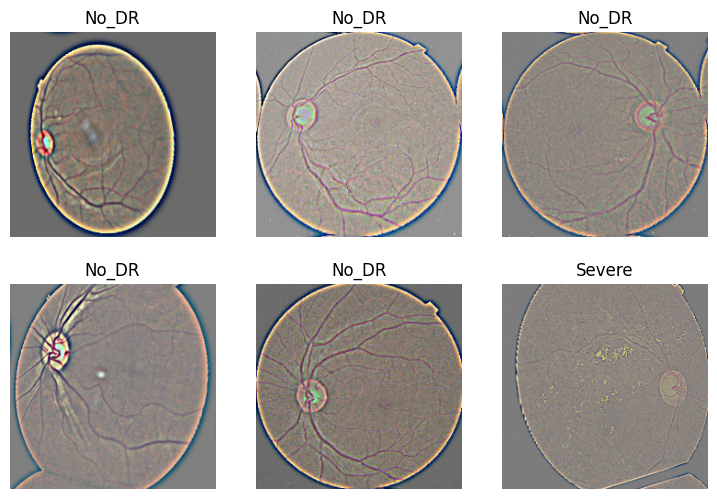

In [8]:
dls = ImageDataLoaders.from_folder(trn_path, valid_pct = 0.2,
                                  item_tfms = Resize(224, method='squish'),
                                  batch_tfms = aug_transforms())

dls.show_batch(max_n=6)

In [9]:
learn_v0 = vision_learner(dls, 'resnet18', metrics =accuracy,path='.').to_fp16()
learn_v0.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/vk/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth
/home/vk/anaconda3/envs/practise/lib/python3.9/site-packages/torch/amp/autocast_mode.py:202: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/home/vk/anaconda3/envs/practise/lib/python3.9/site-packages/torch/cuda/amp/grad_scaler.py:118: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,time
0,1.526156,1.055009,0.685792,54:27


epoch,train_loss,valid_loss,accuracy,time
0,1.043815,0.877436,0.710383,58:50
1,0.928657,0.838674,0.734973,1:11:48
2,0.866299,0.802691,0.739071,55:14


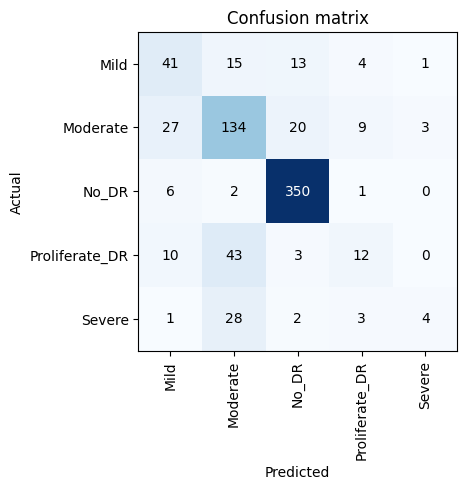

In [10]:
interp = ClassificationInterpretation.from_learner(learn_v0)
interp.plot_confusion_matrix()

In [11]:
df = pd.read_csv(r'/home/vk/Desktop/Retina_Webapp/archive/train.csv', index_col='id_code')
df.index=df.index + "png"
df['diagnosis_io'] = np.where(df['diagnosis'] == 0, 0, 1)
df.head()

,diagnosis,diagnosis_io
id_code,,
000c1434d8d7png,2,1
001639a390f0png,4,1
0024cdab0c1epng,1,1
002c21358ce6png,0,0
005b95c28852png,0,0


In [12]:
def get_disease(p):
    return df.loc[p.name, 'diagnosis_io']

In [13]:
dls = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    n_inp = 1,
    get_items=get_image_files,
    get_y = get_disease,
    splitter = RandomSplitter(0.2),
    item_tfms =Resize(224, method='squish'),
    
    batch_tfms = aug_transforms(),
).dataloaders(trn_path)


dls.show_batch(max_n=6)
    

KeyError: 'dd19428c3d29.png'

In [ ]:


learn_binary = vision_learner(dls, 'resnet18', metrics=accuracy, path='.').to_fp16()
learn_binary.fine_tune(3)



In [ ]:


interp = ClassificationInterpretation.from_learner(learn_binary)
interp.plot_confusion_matrix()



In [ ]:
learn_binary.export()